In [101]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
# Define constants
years = ["2000", "2003", "2004", "2007", "2008", "2011", "2012", "2015", "2016", "2019", "2021"]
results = ["silver", "#CD7F32", "gold", "#CD7F32", "gold", "silver", "gold", "gold", "white", "gold", "white"]
columns = ["Year", "Player", "Age", "Min", "Goals", "Assists"]

In [92]:
# Read in data
df = pd.DataFrame([], columns = columns)
df["Age"] = pd.to_numeric(df["Age"])

for year in years:
    data = pd.read_csv("data/" + year + ".csv")
    data["Year"] = year
    data.rename(columns={"Gls": "Goals", "Ast": "Assists"}, inplace=True)
    data.fillna(0, inplace=True)
    
    data["Player"] = data['Player'].str.split("\\", n = 1, expand = True)
    df = df.append(data[columns], ignore_index=True)

In [93]:
df.describe()

,Age,Min,Goals,Assists
count,221.000000,221.000000,221.000000,221.000000
mean,27.307692,300.280543,0.628959,0.221719
std,4.331217,213.825785,1.201466,0.595955
min,17.000000,0.000000,0.000000,0.000000
25%,24.000000,90.000000,0.000000,0.000000
50%,27.000000,335.000000,0.000000,0.000000
75%,31.000000,489.000000,1.000000,0.000000
max,39.000000,630.000000,6.000000,4.000000


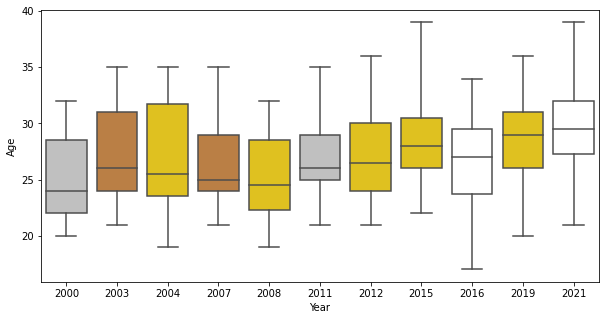

In [107]:
# Box plot of age versus results
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Year"], 
               y=df["Age"],
               whis=2.0,
               palette=results)
plt.savefig("age_by_year.png")

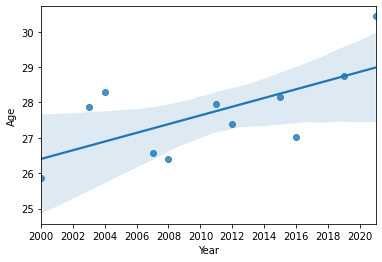

In [177]:
# Age weighted by playing time
wm = lambda x: np.average(x, weights=df.loc[x.index, "Min"])
df_weighted = df.groupby(["Year"]).agg(Age=("Age", wm)).reset_index()
df_weighted = df_weighted.astype({"Year": "int32"})
sns.regplot(x = df_weighted["Year"], 
            y = df_weighted["Age"])
ticks = np.arange(2000, 2022, 2).tolist()
plt.xticks(ticks)
plt.savefig("weighted_by_age.png")

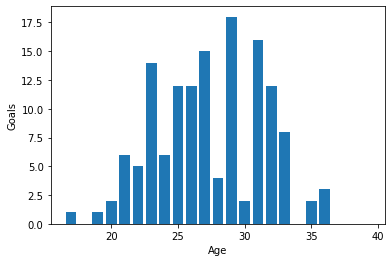

In [126]:
# Look at goals by age
df_goals = df.groupby(["Age"], as_index=False).sum()
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Goals")
ax1.set_xlabel("Age")
plt.bar(df_goals["Age"], df_goals["Goals"])
plt.savefig("goals_by_age.png")

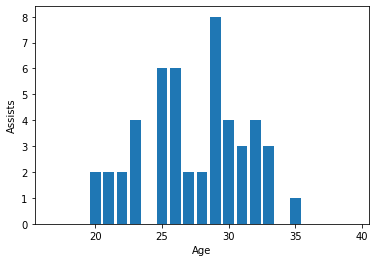

In [127]:
# Look at assists by age
df_goals = df.groupby(["Age"], as_index=False).sum()
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Assists")
ax1.set_xlabel("Age")
plt.bar(df_goals["Age"], df_goals["Assists"])
plt.savefig("assists_by_age.png")